In [3]:
import pandas as pd
from sklearn import tree

data =  pd.read_csv(r'weather_forecast.csv')
data.shape
data.head(14)


,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
data.shape

(14, 5)

In [9]:
X,y = data[['Outlook','Temperature','Humidity','Windy']], data['Play']


In [12]:
one_hot_data = pd.get_dummies(data[['Outlook','Temperature','Humidity','Windy','Play']],drop_first=False)
one_hot_data_X = pd.get_dummies(X, drop_first=False)
one_hot_data_y = pd.get_dummies(y, drop_first=True)
one_hot_data_X.head(14)

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_Strong,Windy_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [11]:
one_hot_data_y.head(14)

,Yes
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [14]:
import matplotlib.pyplot as plt


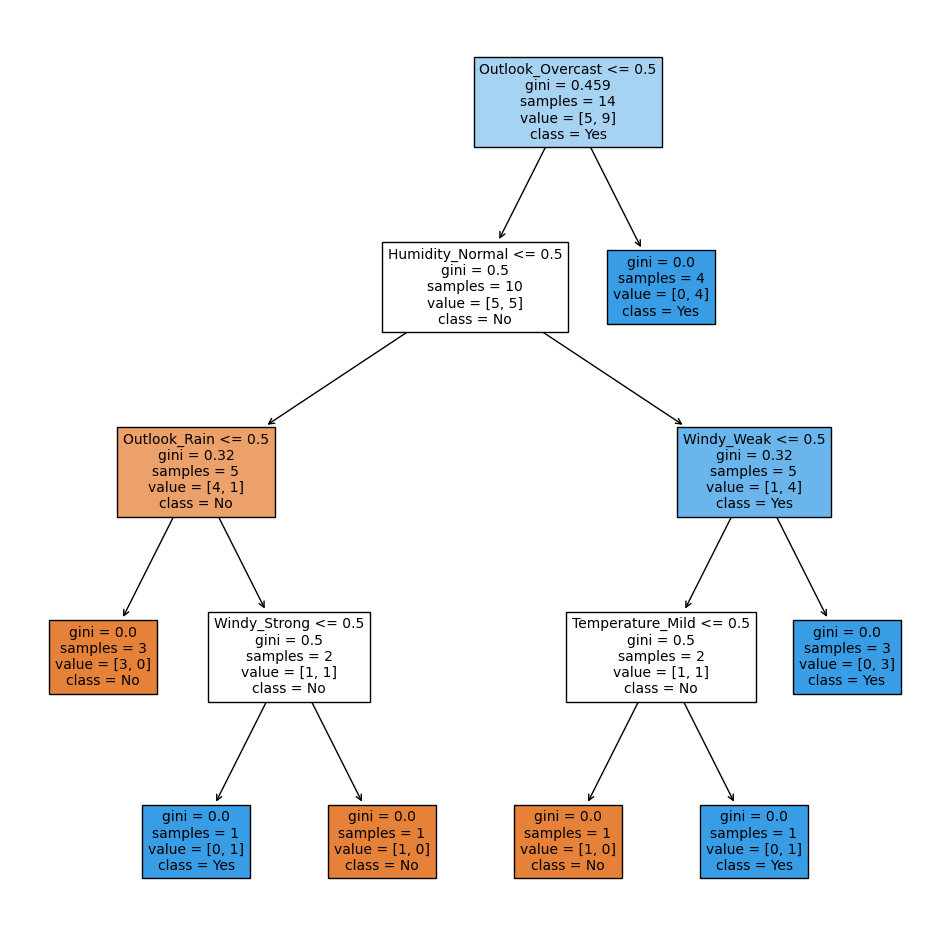

In [15]:
classifier = tree.DecisionTreeClassifier(criterion = 'gini')
classifier = classifier.fit(one_hot_data_X , one_hot_data_y)
plt.figure(figsize = (12,12))
tree.plot_tree(classifier ,  filled = True, feature_names = one_hot_data_X.columns,
              class_names = ['No','Yes'], fontsize = 10)
plt.show()

In [16]:
data_Humidity_High = data[(data['Outlook'] == 'Overcast') & 
                         (data['Humidity'] == 'Normal')]
data_Humidity_High.head()

,Outlook,Temperature,Humidity,Windy,Play
6,Overcast,Cool,Normal,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [18]:
data_Weather_OC = data[data['Outlook']== 'Overcast']
data_Weather_OC.head(14)

,Outlook,Temperature,Humidity,Windy,Play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [19]:
data_Weather_OC = data[data['Outlook'] != 'Overcast']
data_Weather_OC.head(14)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
13,Rain,Mild,High,Strong,No
